In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [54]:
#Import the data
df = pd.read_csv('../data/AviationData_cleaned.csv')
state_codes = pd.read_csv('../data/USState_Codes.csv')

c:\Users\nateh\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (28,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21121 entries, 0 to 21120
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.ID                21121 non-null  object 
 1   Investigation.Type      21121 non-null  object 
 2   Accident.Number         21121 non-null  object 
 3   Event.Date              21121 non-null  object 
 4   Location                21121 non-null  object 
 5   Country                 21121 non-null  object 
 6   Latitude                17946 non-null  object 
 7   Longitude               17939 non-null  object 
 8   Airport.Code            14817 non-null  object 
 9   Airport.Name            15226 non-null  object 
 10  Injury.Severity         21040 non-null  object 
 11  Aircraft.Damage         20642 non-null  object 
 12  Aircraft.Category       21121 non-null  object 
 13  Registration.Number     21114 non-null  object 
 14  Make                    21121 non-null

# Purpose of Flight

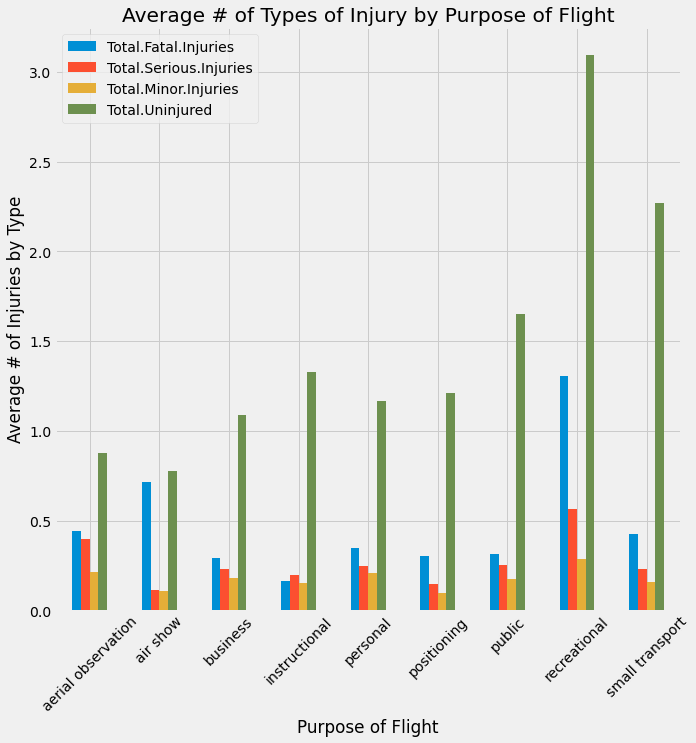

In [56]:
injury_df = df.groupby('Purpose.Binned').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'])

#Dropping unknown from the 'purpose_binned' column of injury_df
injury_df.drop('unknown').plot(kind='bar', figsize=(10, 10))
plt.title('Average # of Types of Injury by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Average # of Injuries by Type');

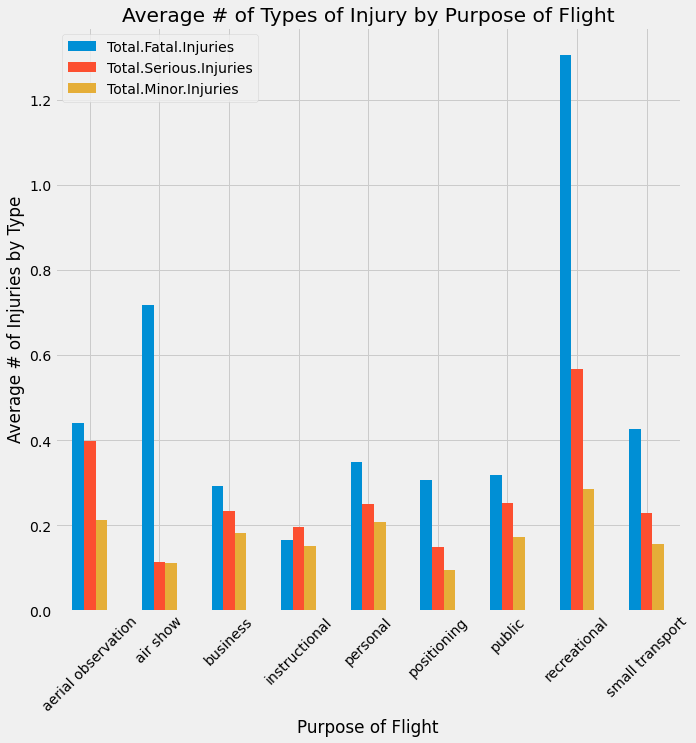

In [57]:
# Repeating the above chart, but without the non-injuries.
injury_df = df.groupby('Purpose.Binned').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'])

#Dropping unknown from the 'purpose_binned' column of injury_df
injury_df.drop('unknown').plot(kind='bar', figsize=(10, 10))
plt.title('Average # of Types of Injury by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Average # of Injuries by Type');

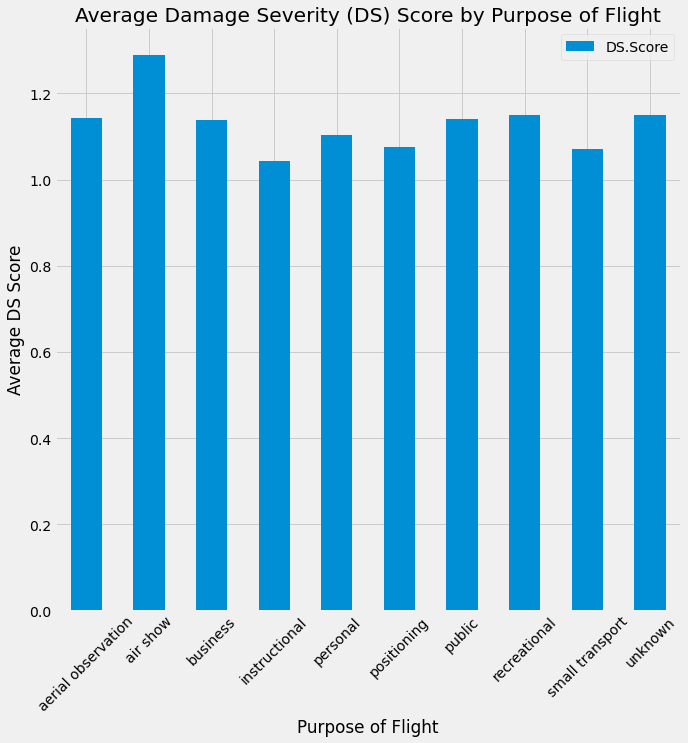

In [58]:

#make DS.Score column all integers
DS_df = df[['Make', 'Purpose.Binned', 'DS.Score']].copy()

# drop rows with 'unknown' in the 'DS.Score' column
DS_df = DS_df[DS_df['DS.Score'] != 'unknown'].dropna()

# convert 'DS.Score' column to integers
DS_df['DS.Score'] = DS_df['DS.Score'].astype(int)

DS_df.groupby('Purpose.Binned').mean().filter(['DS.Score']).plot(kind='bar', figsize=(10, 10))
plt.title('Average Damage Severity (DS) Score by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Average DS Score');

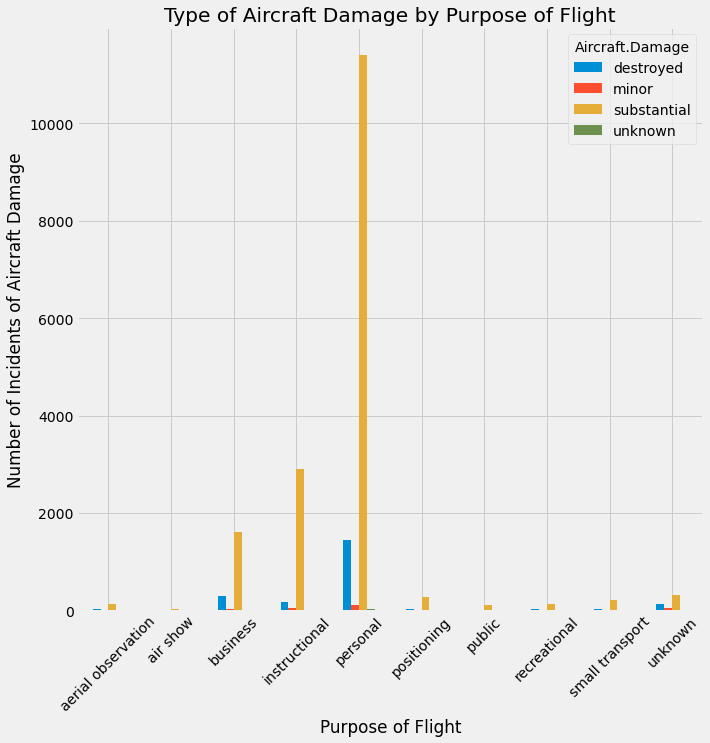

In [59]:
# Create a plot that shows the frequency of the different types of results in Aircraft.Damage, with Purpose.Binned on the x-axis

df.groupby(['Purpose.Binned', 'Aircraft.Damage']).size().unstack().plot(kind='bar', figsize=(10, 10))
plt.title('Type of Aircraft Damage by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Incidents of Aircraft Damage');



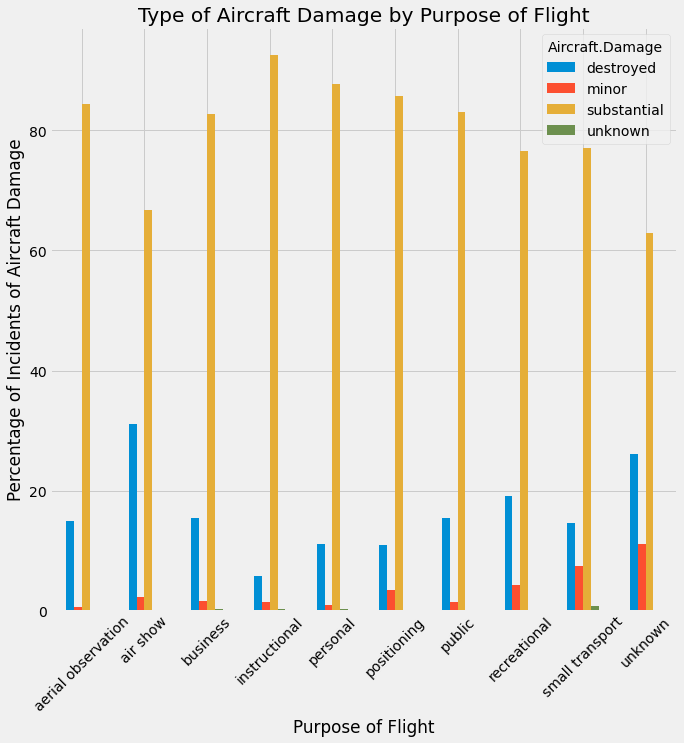

In [60]:
df.groupby(['Purpose.Binned', 'Aircraft.Damage']).size().unstack().apply(lambda x: x/x.sum() * 100, axis=1).plot(kind='bar', figsize=(10, 10))
plt.title('Type of Aircraft Damage by Purpose of Flight')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.ylabel('Percentage of Incidents of Aircraft Damage');

# Makes of Planes

In [61]:
# Making a new df that only accepts the top 25 makes:
top_25 = df['Make'].value_counts().head(25).index.tolist()
top_25_df = df[df['Make'].isin(top_25)].copy()
top_25_df['Make'].value_counts()

cessna                       7730
piper                        4368
beech                        1522
boeing                        456
mooney                        437
airtractor                    414
grumman                       409
cirrus                        330
bellanca                      279
aeronca                       226
maule                         225
dehavilland                   165
champion                      164
luscombe                      162
stinson                       145
north american                114
taylorcraft                   109
aero commander                 95
embraer                        85
airbus                         80
aviat aircraft inc             76
diamond aircraft ind inc       73
aviat                          68
ercoupe                        66
raytheon aircraft company      61
Name: Make, dtype: int64

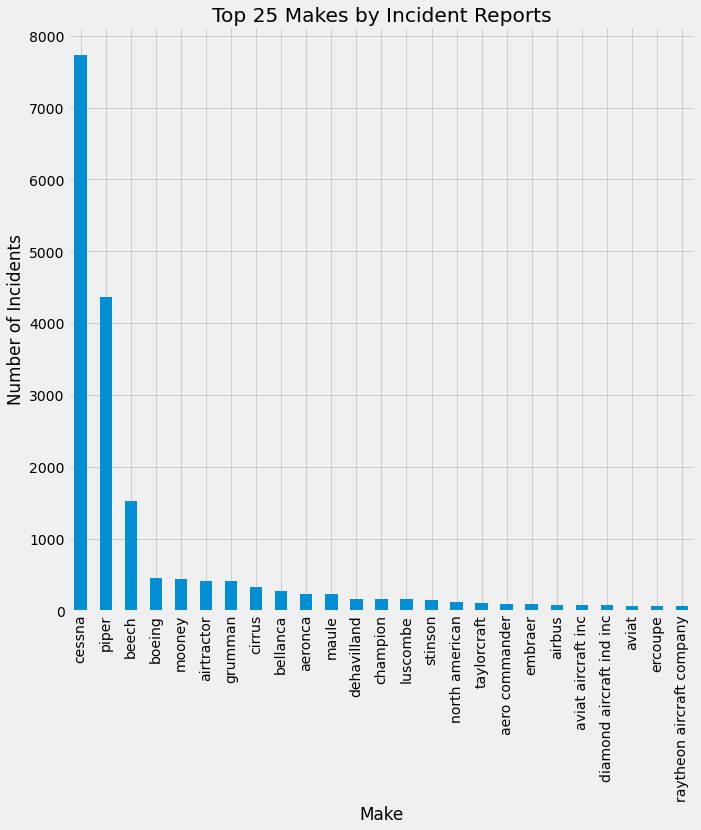

In [62]:
# make a chart of the top 25 makes
top_25_df['Make'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.title('Top 25 Makes by Incident Reports')

plt.xlabel('Make')
plt.ylabel('Number of Incidents');

In [74]:
# and for the top 10 makes:
top_10 = df['Make'].value_counts().head(10).index.tolist()
top_10_df = df[df['Make'].isin(top_10)].copy()
top_10_df['Make'].value_counts()


cessna        7730
piper         4368
beech         1522
boeing         456
mooney         437
airtractor     414
grumman        409
cirrus         330
bellanca       279
aeronca        226
Name: Make, dtype: int64

<AxesSubplot:>

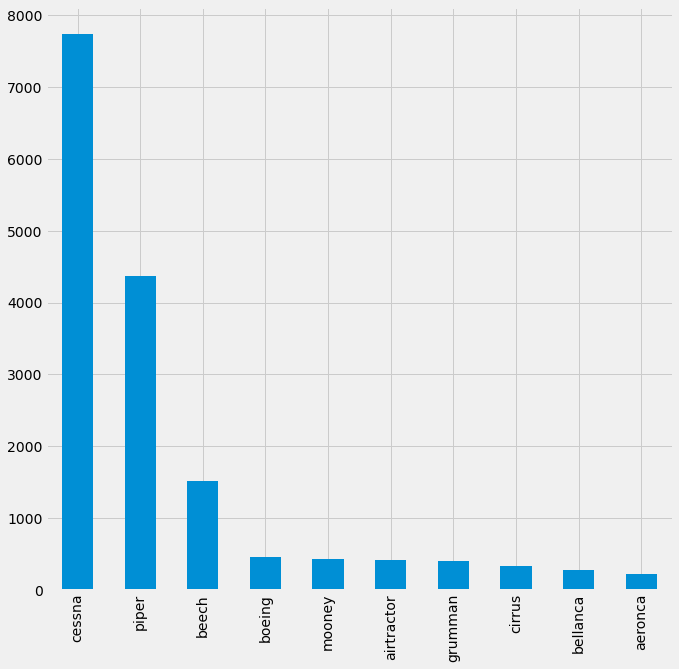

In [75]:
# and the chart for the frequencies of the top 10

top_10_df['Make'].value_counts().plot(kind='bar', figsize=(10, 10))

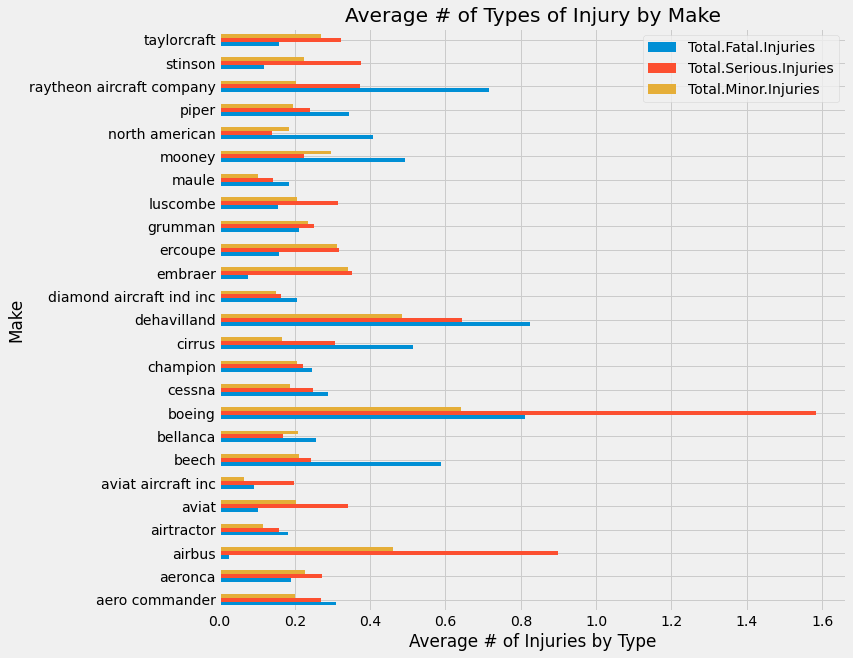

In [63]:
top_25_df.groupby('Make').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']).plot(kind='barh', figsize=(10, 10))
plt.title('Average # of Types of Injury by Make')
plt.xlabel('Average # of Injuries by Type')
plt.ylabel('Make');

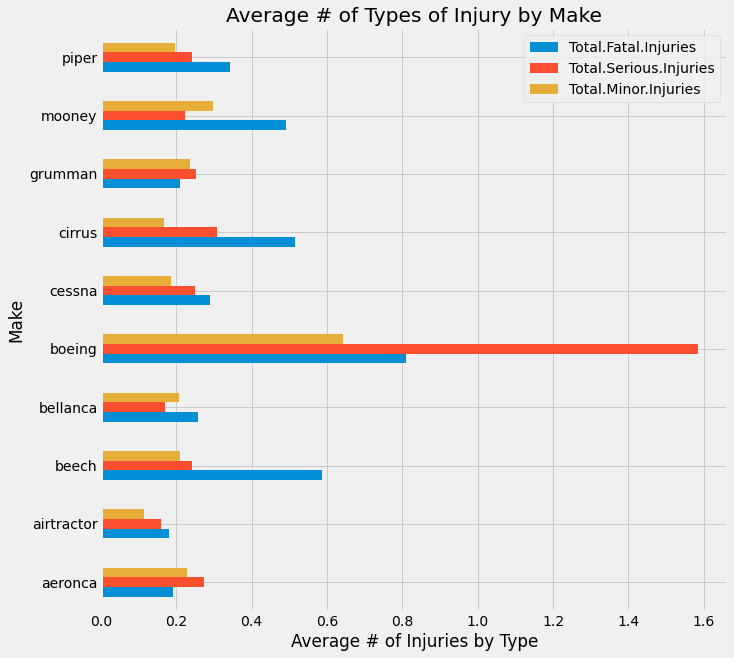

In [76]:
top_10_df.groupby('Make').mean().filter(['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']).plot(kind='barh', figsize=(10, 10))
plt.title('Average # of Types of Injury by Make')
plt.xlabel('Average # of Injuries by Type')
plt.ylabel('Make');

<ipython-input-64-405c68bae261>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_makes_df_2['DS.Score'] = top_makes_df_2['DS.Score'].dropna().astype(int)


<AxesSubplot:xlabel='Make'>

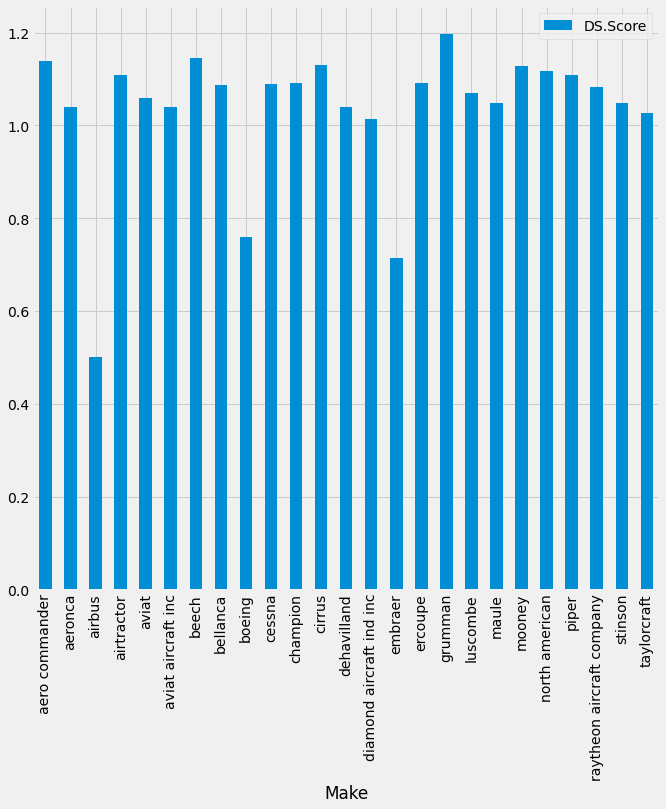

In [64]:
# drop rows with 'unknown' in the 'DS.Score' column
top_makes_df_2 = top_25_df[top_makes_df['DS.Score'] != 'unknown']

# convert 'DS.Score' column to integers
top_makes_df_2['DS.Score'] = top_makes_df_2['DS.Score'].dropna().astype(int)

top_makes_df_2.groupby('Make').mean().filter(['DS.Score']).plot(kind='bar', figsize=(10, 10))


Is there a way to group by size of aircraft produced?
Market cap?

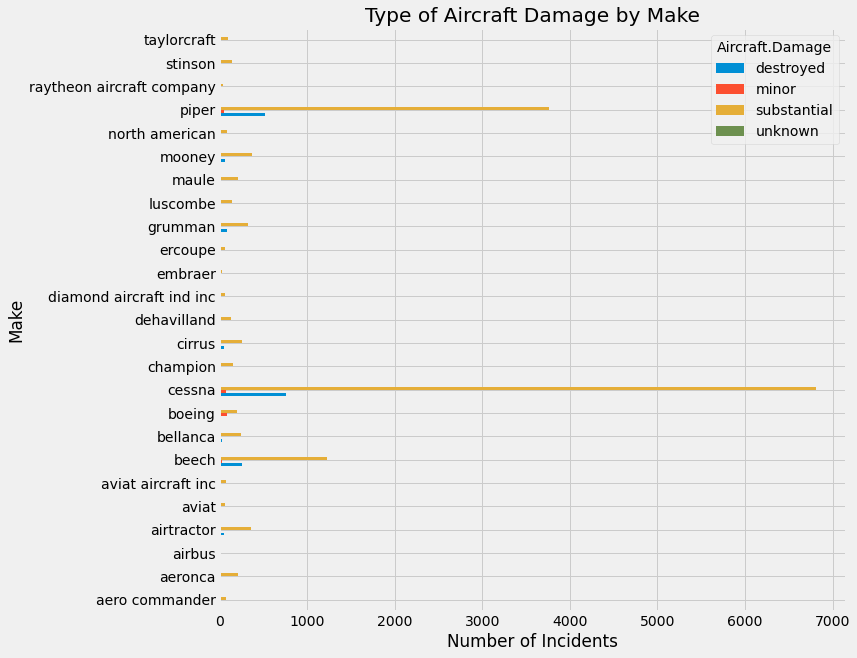

In [77]:

top_25_df.groupby(['Make', 'Aircraft.Damage']).size().unstack().plot(kind='barh', figsize=(10, 10))
plt.title('Type of Aircraft Damage by Make')

plt.xlabel('Number of Incidents')
plt.ylabel('Make');


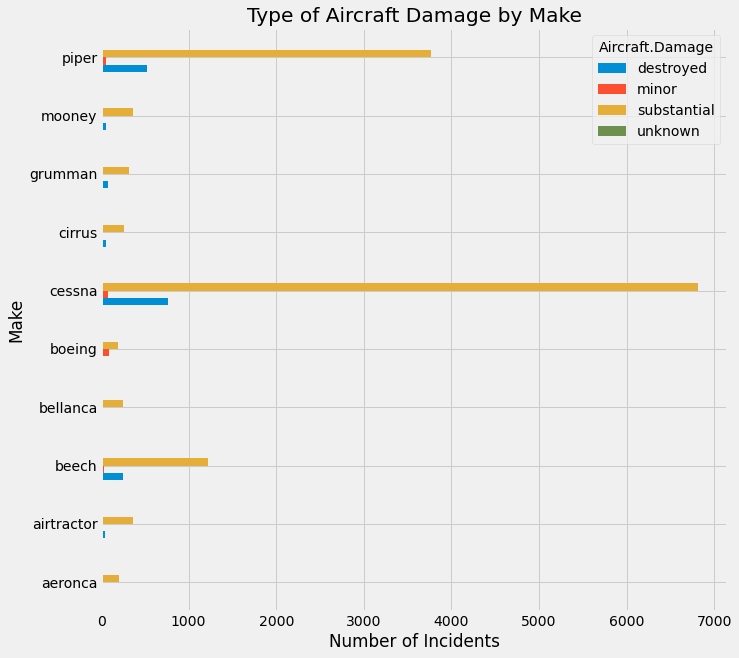

In [79]:

top_10_df.groupby(['Make', 'Aircraft.Damage']).size().unstack().plot(kind='barh', figsize=(10, 10))
plt.title('Type of Aircraft Damage by Make')

plt.xlabel('Number of Incidents')
plt.ylabel('Make');


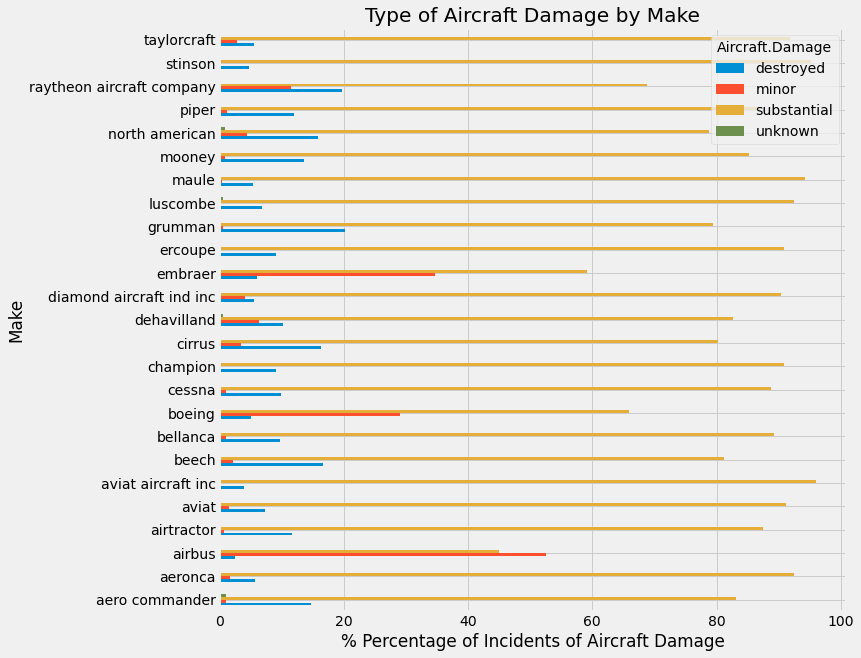

In [82]:
top_25_df.groupby(['Make', 'Aircraft.Damage']).size().unstack().apply(lambda x: x/x.sum() * 100, axis=1).plot(kind='barh', figsize=(10, 10))
plt.title('Type of Aircraft Damage by Make')
plt.xlabel('% Percentage of Incidents of Aircraft Damage')
plt.ylabel('Make');


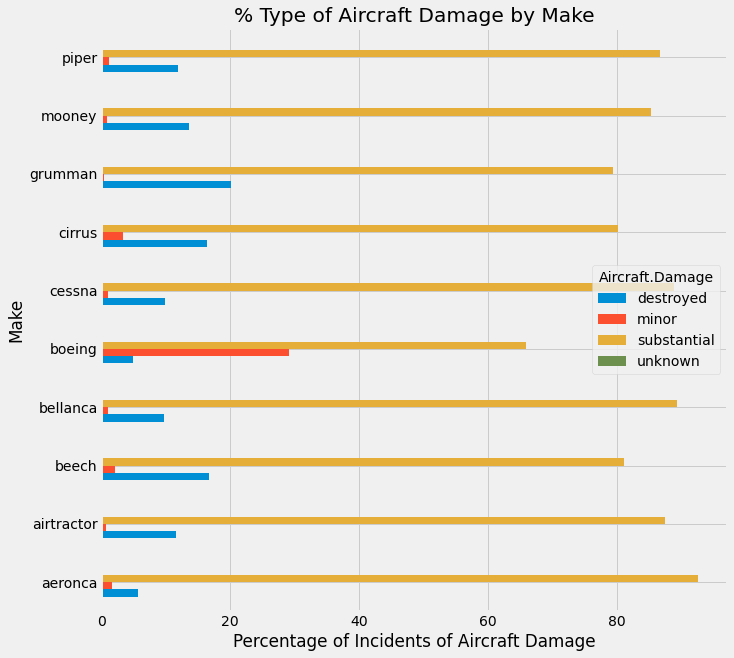

In [81]:
top_10_df.groupby(['Make', 'Aircraft.Damage']).size().unstack().apply(lambda x: x/x.sum() * 100, axis=1).plot(kind='barh', figsize=(10, 10))
plt.title('% Type of Aircraft Damage by Make')
plt.xlabel('Percentage of Incidents of Aircraft Damage')
plt.ylabel('Make');


# Longitudinal

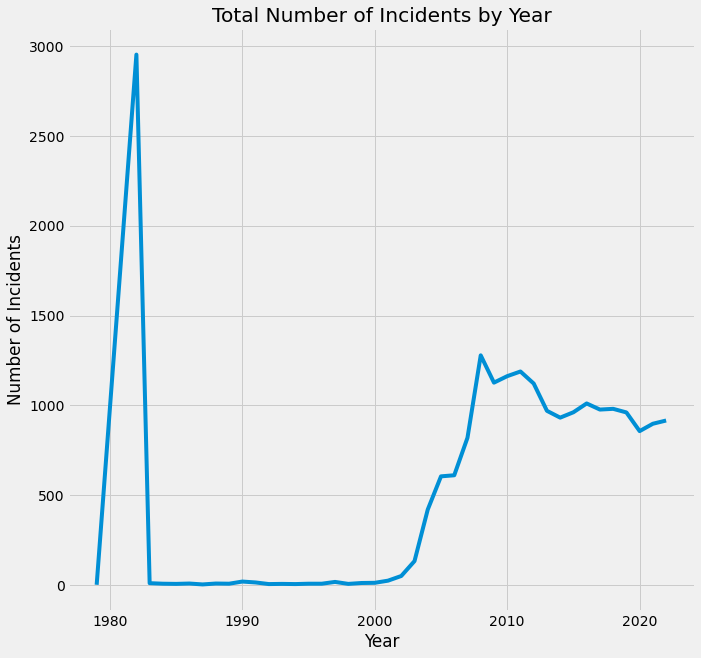

In [67]:
# Plot of total number of incidents by year

df['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 10))
plt.title('Total Number of Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents');

In [68]:

df['Investigation.Type'].value_counts().sort_index()


accident    20564
incident      557
Name: Investigation.Type, dtype: int64

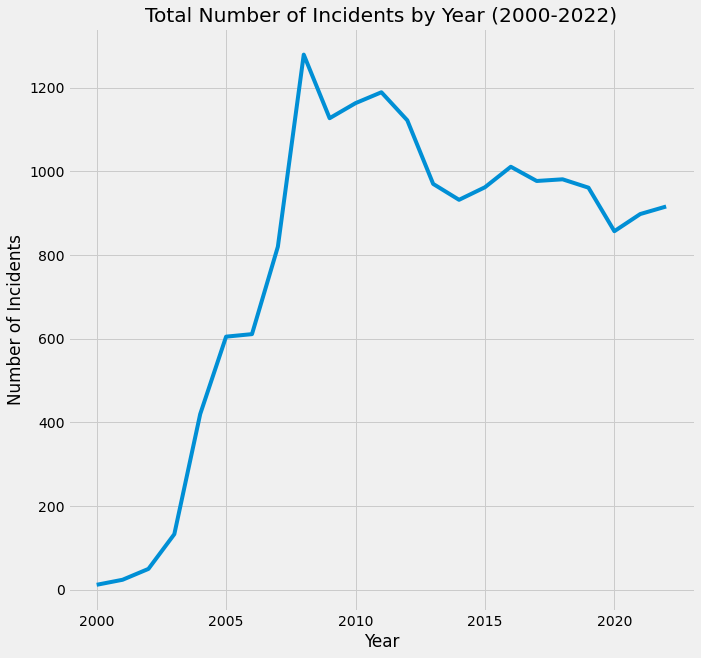

In [69]:
# df of the incidents after the year 2000
df_2000 = df[df['Year'] >= 2000].copy()

df_2000['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 10))
plt.title('Total Number of Incidents by Year (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents');

<AxesSubplot:>

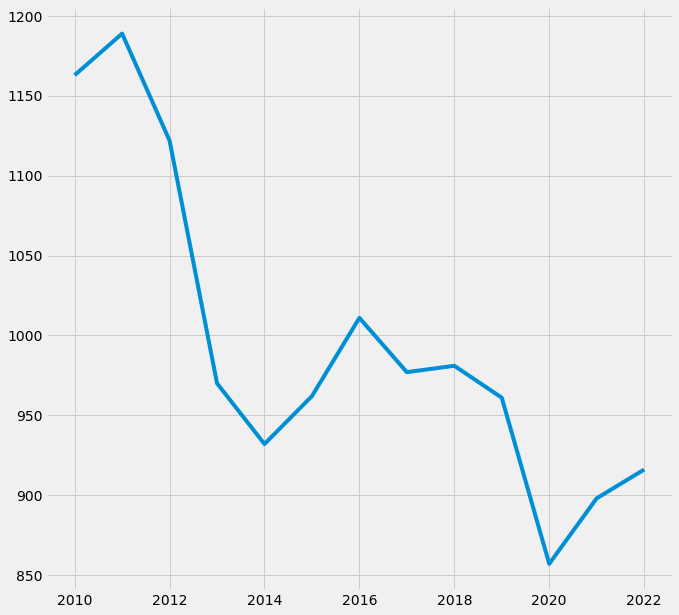

In [70]:
df_2010 = df[df['Year'] >= 2010].copy()
df_2010['Year'].value_counts().sort_index().plot(kind='line', figsize=(10, 10))

In [71]:
df['Investigation.Type'].value_counts()

accident    20564
incident      557
Name: Investigation.Type, dtype: int64

# Weather

<ipython-input-72-d221156ccb73>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x/100) for x in ax.get_xticks()]);


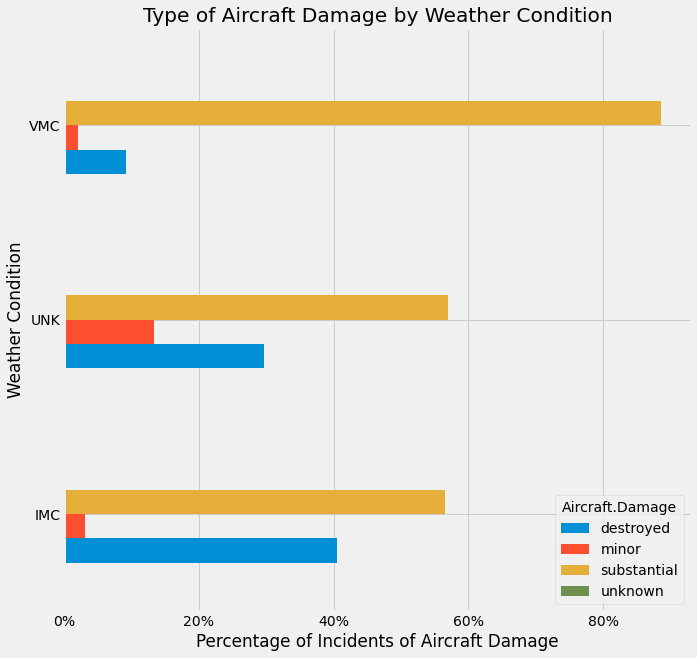

In [72]:
ax = df.groupby(['Weather.Condition', 'Aircraft.Damage']).size().unstack().apply(lambda x: x/x.sum() * 100, axis=1).plot(kind='barh', figsize=(10, 10))
ax.set_xticklabels(['{:,.0%}'.format(x/100) for x in ax.get_xticks()]);
plt.title('Type of Aircraft Damage by Weather Condition')
plt.xlabel('Percentage of Incidents of Aircraft Damage')
plt.ylabel('Weather Condition');


In [73]:
df.groupby('Weather.Condition').count()

,Event.ID,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Uninjured,Broad.Phase.of.Flight,Report.Status,Publication.Date,Year,State.Code,State.Name,Purpose.Binned,Num.Fatalities,DS.Score
Weather.Condition,,,,,,,,,,,,,,,,,,,,,
IMC,1253,1253,1253,1253,1253,1253,935,935,725,740,...,1199,424,1143,1253,1253,1252,1252,1085,1253,1191
UNK,162,162,162,162,162,162,108,108,61,60,...,160,55,147,161,162,162,162,110,162,128
VMC,19278,19278,19278,19278,19278,19278,16496,16489,13763,14248,...,18779,5286,17847,19157,19278,19244,19242,18397,19278,18941
